In [1]:
pip install xlrd pandas scikit-learn xgboost lightgbm 

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_excel("CTG.xls", sheet_name="Raw Data") 

In [3]:
df=df.drop(columns=['b', 'e', 'LBE','FileName','Date','SegFile','A','B','C','D','E','AD','DE','LD','FS','SUSP','CLASS','DR'])
df=df.drop([0, 2127, 2128, 2129])
df=df.drop_duplicates()
df

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2122,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,0.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2123,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2124,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,0.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2125,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


/var/folders/rw/h6tjdkqn1w36vb176b6ch3tw0000gn/T/ipykernel_97223/2577664302.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')


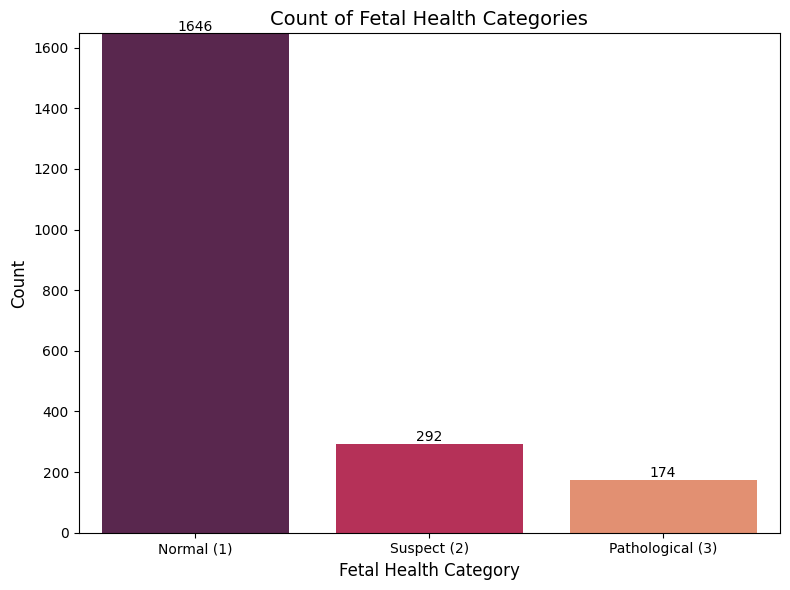

In [4]:
fetal_health_counts = df['NSP'].value_counts()
fetal_health_counts.index = ['Normal (1)', 'Suspect (2)', 'Pathological (3)']

plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x=fetal_health_counts.index, y=fetal_health_counts.values, palette='rocket')

for i, count in enumerate(fetal_health_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontsize=10)

plt.title('Count of Fetal Health Categories', fontsize=14)
plt.xlabel('Fetal Health Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, max(fetal_health_counts.values) + 1)  

plt.tight_layout()
plt.show()

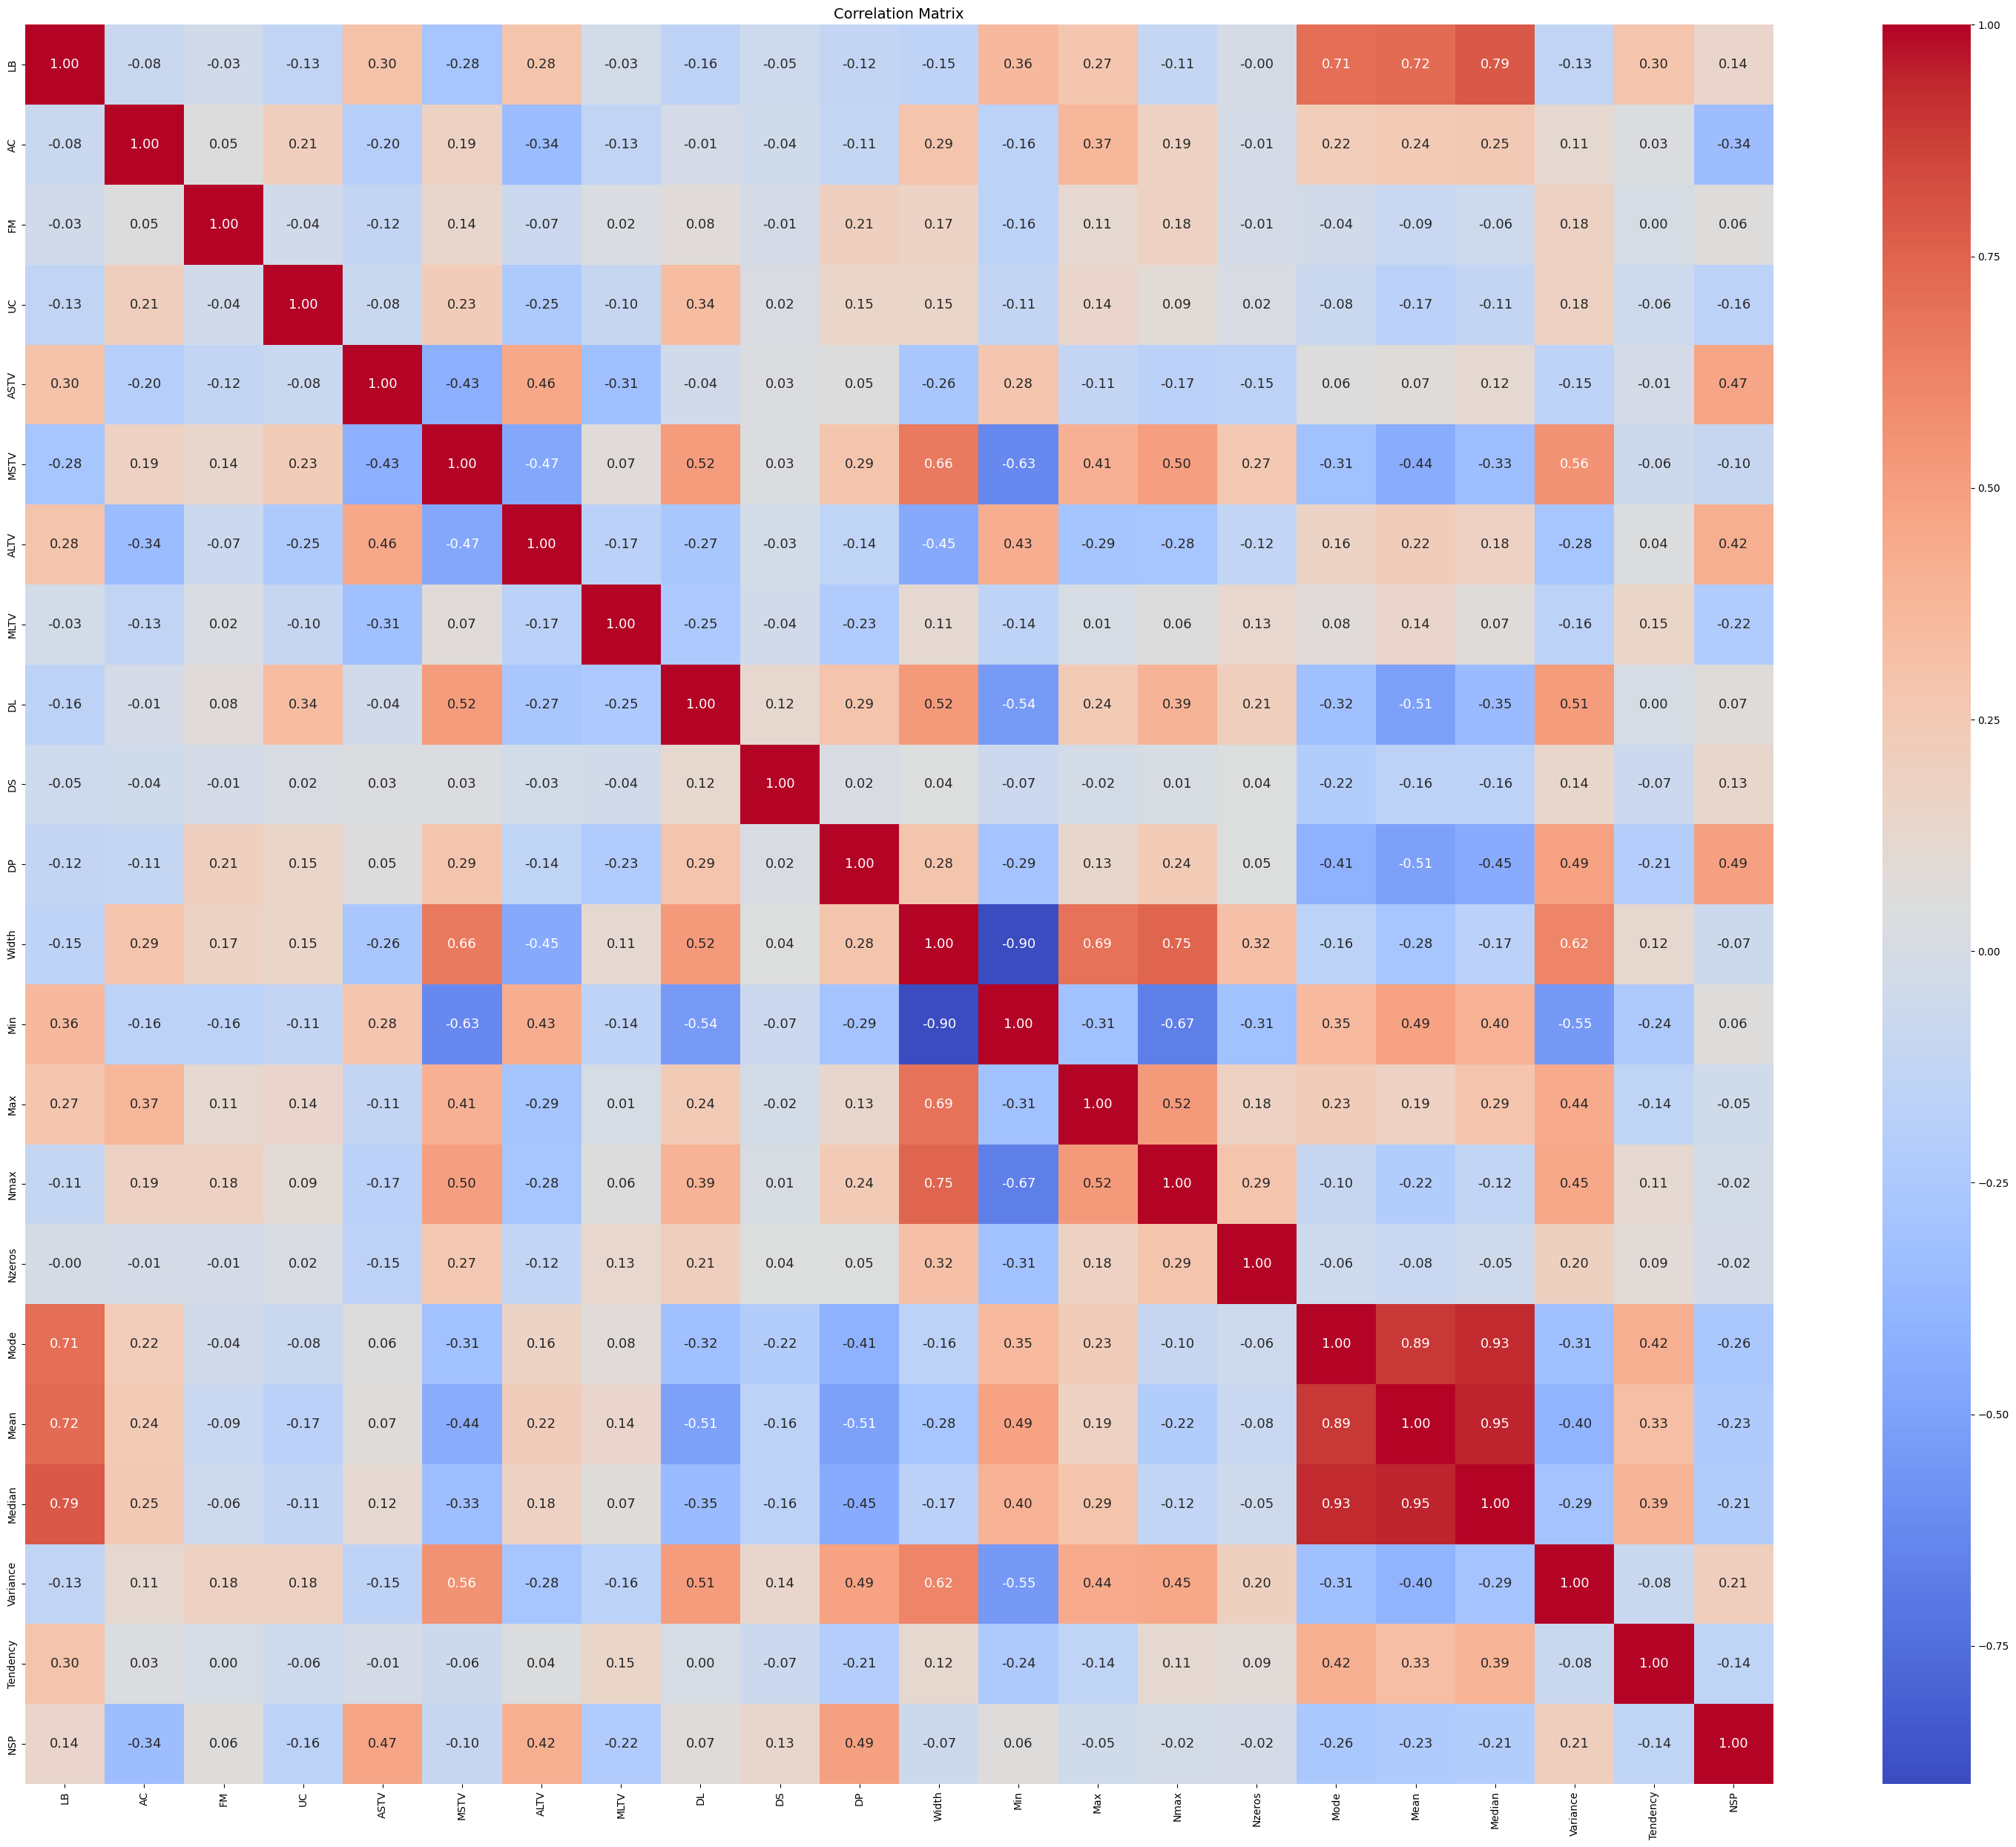

In [5]:
correlation_matrix = df.corr()

plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, annot_kws={'size': 13})
plt.title('Correlation Matrix', fontsize=14)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()

In [6]:
df.drop(['Median', 'Mode', 'DS', 'Nzeros', 'Tendency'], axis = 1, inplace = True)


ANOVA Test Results:

Top 5 Most Significant Features:
      f_statistic        p_value  significant
DP     546.461581  6.066711e-192         True
ASTV   335.871825  2.349780e-127         True
ALTV   334.227343  8.184850e-127         True
Mean   302.528939  3.071902e-116         True
AC     166.384894   8.019190e-68         True

Least Significant Features:
       f_statistic       p_value  significant
UC       61.223620  1.426132e-26         True
Width    54.665211  7.146420e-24         True
Nmax     11.874388  7.444545e-06         True
FM        5.039472  6.555388e-03         True
Max       2.460631  8.562619e-02        False


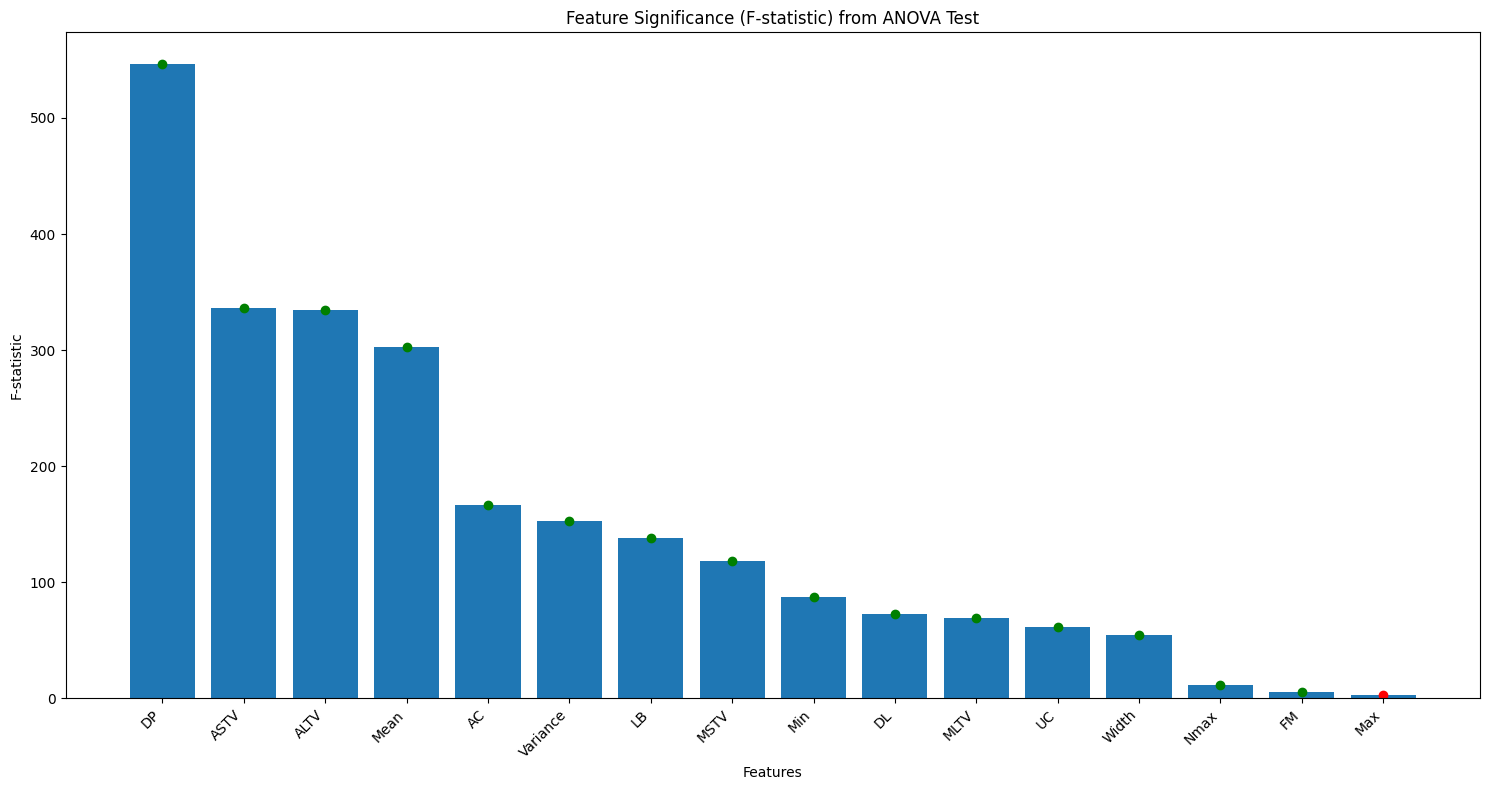


Percentage of statistically significant features: 93.75%


In [7]:
def perform_anova_analysis(df):

    anova_results = {}

    for feature in df.columns[:-1]: 
        classes = [
            group[feature].values 
            for name, group in df.groupby('NSP')
        ]

        f_statistic, p_value = stats.f_oneway(*classes)

        anova_results[feature] = {
            'f_statistic': f_statistic,
            'p_value': p_value
        }

    results_df = pd.DataFrame(anova_results).T
    results_df['significant'] = results_df['p_value'] < 0.05

    results_df = results_df.sort_values('f_statistic', ascending=False)
    
    return results_df

def plot_anova_results(results_df):
    
    plt.figure(figsize=(15, 8))
    plt.bar(range(len(results_df)), results_df['f_statistic'])
    plt.xticks(range(len(results_df)), results_df.index, rotation=45, ha='right')
    plt.title('Feature Significance (F-statistic) from ANOVA Test')
    plt.xlabel('Features')
    plt.ylabel('F-statistic')

    for i, significant in enumerate(results_df['significant']):
        color = 'green' if significant else 'red'
        plt.plot(i, results_df['f_statistic'].iloc[i], 'o', color=color)
    
    plt.tight_layout()
    
    return plt

results = perform_anova_analysis(df)

print("\nANOVA Test Results:")
print("\nTop 5 Most Significant Features:")
print(results.head())
print("\nLeast Significant Features:")
print(results.tail())

plot_anova_results(results)
plt.show()

significant_features = results['significant'].sum()
total_features = len(results)
print(f"\nPercentage of statistically significant features: {(significant_features/total_features)*100:.2f}%")

In [8]:
df=df.drop(columns=['Max'])

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df['NSP']
X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(sampling_strategy='auto')  # auto means all classes will be resampled to the same number
X_train, y_train = smote.fit_resample(X_t, y_t)

In [10]:
X_train.shape, X_test.shape

((3444, 15), (634, 15))

In [ ]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Adjust the target values so they start from 0
y_train = y_train - 1
y_test = y_test - 1

poly = PolynomialFeatures(2)
X_train=poly.fit_transform(X_train)
X_test=poly.fit_transform(X_test)


NameError: name 'PolynomialFeatures' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, balanced_accuracy_score, f1_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    #'CatBoost': CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False),
    'SVM': SVC(kernel='linear', probability=True, random_state = 0),  
    'KNN': KNeighborsClassifier(n_neighbors=5),  
    'LogisticRegression': LogisticRegression(max_iter=200), 
    'NaiveBayes': GaussianNB(), 
    'AdaBoost': AdaBoostClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
}

def train_models(X_train, y_train, X_test, y_test):
    results = {}
    
    for model_name, model in models.items():
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) 
        
        accuracy = model.score(X_test, y_test, sample_weight=None)
        
        # Calculate ROC AUC
        lb = LabelBinarizer()
        lb.fit(y_train)
        y_test_bin = lb.transform(y_test)
        roc_auc = roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr')
        macro_f1 = f1_score(y_test, y_pred, average='macro')
        
        results[model_name] = {
            "accuracy": accuracy,
            "roc_auc": roc_auc,
            "macro_f1":macro_f1
        }

        print(f"\n{model_name} - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}\n, Macro F1: {macro_f1:.4f}\n")
        
        cm = confusion_matrix(y_test, y_pred)
        
        # Plot Confusion Matrix
        plt.figure(figsize=(4, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
        plt.title(f"Confusion Matrix - {model_name}")
        plt.xlabel('Predicted Labels')
        plt.ylabel('True Labels')
        plt.show()

        # Classification Report
        print(f"\nClassification Report for {model_name}:\n")
        print(classification_report(y_test, y_pred))
        print("\n")
    
    return results

results = train_models(X_train, y_train, X_test, y_test)

rows = []
for model_name, metrics in results.items():
    row = {'Model': model_name}
    row.update(metrics)
    rows.append(row)

# Create DataFrame
results_df = pd.DataFrame(rows)

# Display the table
print(results_df)


In [ ]:
results_df.to_csv('withsmote.csv', index=False)

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
pip install scikit-optimize

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) 
# Calculate ROC AUC
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)
# Evaluate results

print("Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC", roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr'))
print("macro_f1", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
X_train.shape

In [ ]:
from math import gamma
from skopt import BayesSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import PredefinedSplit

# Define search space with skopt's syntax
search_spaces = {
    'max_depth': (3, 20),              # integer from 3 to 10
    'learning_rate': (0.01, 3, 'log-uniform'),  # log-uniform float
    'n_estimators': (100, 600),        # integer 100 to 300
    'subsample': (0.6, 1),           # float from 0.6 to 1.0
    'colsample_bytree': (0.2, 1),    # float from 0.6 to 1.0
    'min_child_weight': (0, 10),
    'gamma': (0,5),
    'reg_alpha': (0,1)
}

test_fold = [-1] * len(X_train) + [0] * len(X_test)
ps = PredefinedSplit(test_fold=test_fold)

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

opt = BayesSearchCV(
    estimator=xgb,
    search_spaces=search_spaces,
    n_iter=60,           # Number of sampling iterations
    scoring='accuracy',
    cv=ps,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

X_train_val = np.concatenate((X_train, X_test), axis=0)
y_train_val = np.concatenate((y_train, y_test), axis=0)
opt.fit(X_train_val, y_train_val)
print("Best parameters:", opt.best_params_)
print("Best acc:", opt.best_score_)

In [ ]:
import xgboost as xgb
model = XGBClassifier(eval_metric='logloss', random_state=42, colsample_bytree= 1.0, gamma = 0, learning_rate=0.20795509937716639, max_depth=20, min_child_weight=0, n_estimators=100, reg_alpha=0, subsample = 1.0)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test) 
# Calculate ROC AUC
lb = LabelBinarizer()
lb.fit(y_train)
y_test_bin = lb.transform(y_test)
# Evaluate results

cm = confusion_matrix(y_test, y_pred)
        
# Plot Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title(f"Confusion Matrix - {'XGBoost'}")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC", roc_auc_score(y_test_bin, y_pred_proba, multi_class='ovr'))
print("macro_f1", f1_score(y_test, y_pred, average='macro'))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
df

In [ ]:
from sklearn.svm import SVC # Importing the relevant classifier
classifier = SVC(kernel = 'linear', random_state = 0) # Choosing a linear Kernel for SVC and not K-svc
classifier.fit(X_train, y_train)# Fitting the classifier onto our dataset
score = classifier.score(X_test, y_test, sample_weight=None) # Checking how well it did

# Predicting the Test set results
y_pred = classifier.predict(X_test) # Still all pretty good

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)

print('The score is : '+str(score))   
label = ["N","S","P"]
sns.heatmap(cm1, annot=True, xticklabels=label, yticklabels=label, cmap="YlGnBu")
plt.show()